<a href="https://colab.research.google.com/github/Kshitijasharma/celebal_internship/blob/main/feature_scaling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 1**

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load a dataset (for example, using Seaborn's built-in dataset)
df = sns.load_dataset('tips')

# Display the first few rows of the dataset to understand its structure
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


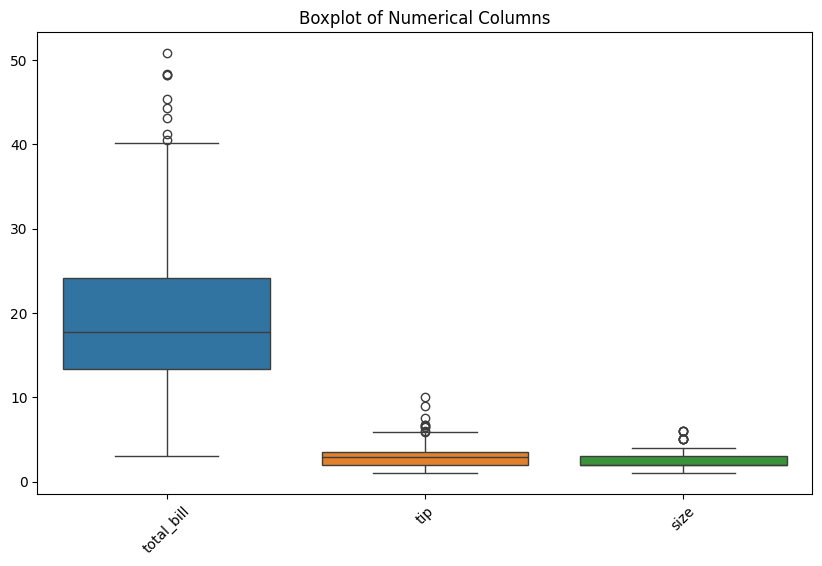

In [ ]:
# Plot boxplot for numerical columns
plt.figure(figsize=(10, 6))     # Create a new figure with a specific size (10 inches wide by 6 inches tall)
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


**STANDARDIZATION TECHNIQUE**

In [ ]:
# Function to replace outliers using standardization (z-score)
def replace_outliers_std(df, threshold=3):
    numerical_cols = df.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

    # Identify outliers
    for col in numerical_cols:
        outliers = np.abs(df_scaled[col]) > threshold
        df_scaled.loc[outliers, col] = np.sign(df_scaled.loc[outliers, col]) * threshold

    # Inverse transform to original scale
    df[numerical_cols] = scaler.inverse_transform(df_scaled)
    return df


In [ ]:
# Replace outliers in the dataframe
df = replace_outliers_std(df)

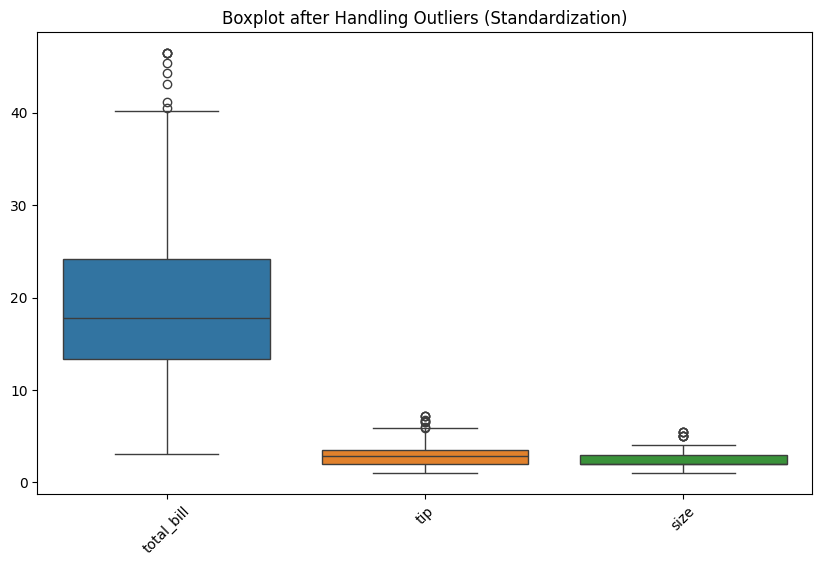

In [ ]:
# Plot boxplot after replacing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot after Handling Outliers (Standardization)')
plt.xticks(rotation=45)
plt.show()

**Min-Max approach**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Function to replace outliers using Min-Max scaling
def replace_outliers_minmax(data, threshold=1.5):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    mask = np.abs(scaled_data - 0.5) > threshold / 2
    data[mask] = np.sign(scaled_data[mask] - 0.5) * threshold / 2 + 0.5
    return data

In [ ]:
# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns

# Replace outliers in each numerical column
df[numerical_cols] = replace_outliers_minmax(df[numerical_cols].values)


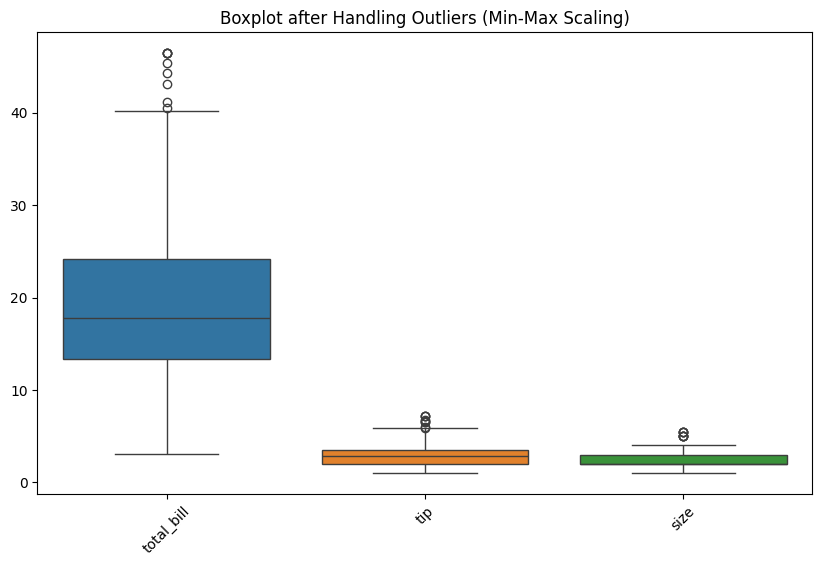

In [ ]:
# Plot boxplot after replacing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot after Handling Outliers (Min-Max Scaling)')
plt.xticks(rotation=45)
plt.show()

*PART 2 * : MaxAbS Scaler and Robust Scaler approach




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

In [2]:
df=sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_features)

['total_bill', 'tip', 'size']


In [4]:
# apply maxabsScaler
max_abs_scaler = MaxAbsScaler()
df_max_abs_scaled = df.copy()
df[numerical_features]=max_abs_scaler.fit_transform(df[numerical_features])


In [5]:
# Display the first few rows of the MaxAbs scaled dataset
print("\nMaxAbs Scaled Data:")
print(df_max_abs_scaled.head())


MaxAbs Scaled Data:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
# Apply RobustScaler
robust_scaler = RobustScaler()
df_robust_scaled = df.copy()
df_robust_scaled[numerical_features] = robust_scaler.fit_transform(df[numerical_features])


In [7]:
print("\nRobust Scaled Data:")
print(df_robust_scaled.head())


Robust Scaled Data:
   total_bill     tip     sex smoker  day    time  size
0   -0.074675 -1.2096  Female     No  Sun  Dinner   0.0
1   -0.691558 -0.7936    Male     No  Sun  Dinner   1.0
2    0.298237  0.3840    Male     No  Sun  Dinner   1.0
3    0.545918  0.2624    Male     No  Sun  Dinner   0.0
4    0.630334  0.4544  Female     No  Sun  Dinner   2.0
